In [1]:
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
business_data = open('dataset/business.json')

business = []

for line in business_data:
    business.append(json.loads(line))

In [7]:
user_data = open('dataset/user.json')

users = []

for line in user_data:
    users.append(json.loads(line))

In [8]:
review_count = []

for b in business:
    if 'Restaurants' in b['categories']:
        review_count.append(b['review_count'])

print(len(review_count))

54618


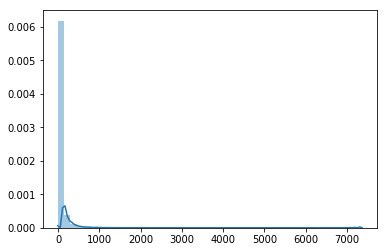

In [9]:
sns.distplot(review_count)

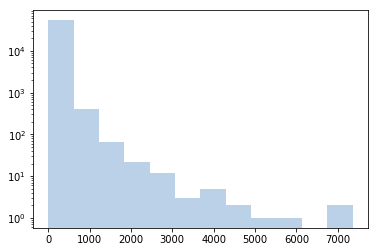

In [10]:
y, bins, patches = plt.hist(review_count, 12, log=True, facecolor='#6699cc', alpha=0.45)

In [11]:
avg_stars = []
for u in users:
    avg_stars.append(u['average_stars'])

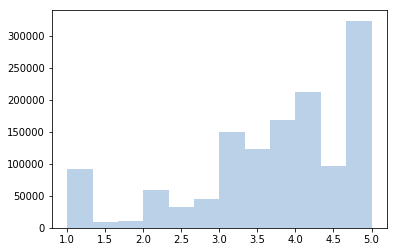

In [12]:
y, bins, patches = plt.hist(avg_stars, 12, log=False, facecolor='#6699cc', alpha=0.45)

In [14]:
friend_counts = []
for user in users:
    friend_counts.append(len(user["friends"]))

print(len(friend_counts))

1326101


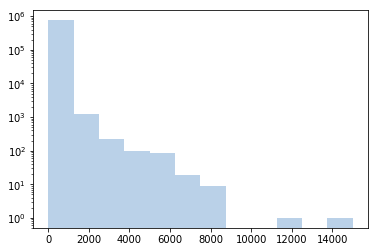

In [15]:
nonzero_friend_counts = [c for c in friend_counts if c>0]
y, bins, patches = plt.hist(nonzero_friend_counts, 12, log=True, facecolor='#6699cc', alpha=0.45)

In [16]:
review_count_by_elite_years = []
for i in range(15):
    review_count_by_elite_years.append([])

In [17]:
for user in users:
    elite_years = len(user['elite'])
    review_count_by_elite_years[elite_years].append(user['review_count'])

In [18]:
elite = sum(len(review_count_by_elite_years[i]) for i in range(1,len(review_count_by_elite_years)))

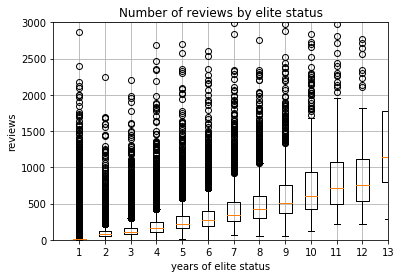

In [19]:
plt.boxplot(review_count_by_elite_years)
plt.axis([0,13,0,3000])
plt.ylabel('reviews')
plt.xlabel('years of elite status')
plt.title('Number of reviews by elite status')
plt.grid(True)
plt.show()

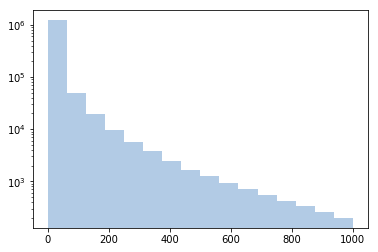

In [20]:
review_counts = [user['review_count'] for user in users if user['review_count']>0 and user['review_count']<1000]
y, bins, patches = plt.hist(review_counts, 16, log=True, facecolor='#6699cc', alpha=0.50)

In [21]:
def get_noise_level(NL):
    if (NL == "quiet"):
        return 0
    if (NL == "average"):
        return 1
    if (NL == 'loud'):
        return 1
    if (NL == 'very_loud'):
        return 1
    print(NL)
    return 0

def get_alcohol_level(AC):
    if (AC == 'full_bar'):
        return 1
    if (AC == 'beer_and_wine'):
        return 1
    if (AC == 'none'):
        return 0
    print(AC)
    return 0

def get_smoke_level(SM):
    if (SM == 'no'):
        return 0
    if (SM == 'yes'):
        return 1
    if (SM == 'outdoor'):
        return 1
    print(SM)
    return 0

business_categories = []

for b in business:
    if 'Restaurants' in b['categories']:
        attr = b['attributes']
        if 'Alcohol' in b['attributes']:
            alc_lvl = get_alcohol_level(attr['Alcohol'])
        else:
            alc_lvl = 0
            
        if 'NoiseLevel' in b['attributes']:
            noise_lvl = get_noise_level(attr['NoiseLevel'])
        else:
            noise_lvl = 0
            
        if 'Smoking' in b['attributes']:
            smoke_lvl = get_smoke_level(attr['Smoking'])
        else:
            smoke_lvl = 0
                
        business_categories.append({
            'Alcohol': alc_lvl,
            'NoiseLevel': noise_lvl,
            'Smoking': smoke_lvl,
        })
print(len(business_categories))

54618


In [22]:
business_categories_df = pd.DataFrame(business_categories)
business_categories_df.corr()['NoiseLevel']

Alcohol       0.317504
NoiseLevel    1.000000
Smoking       0.137714
Name: NoiseLevel, dtype: float64

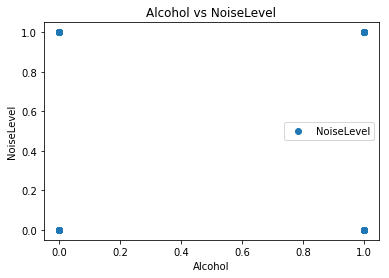

In [23]:
business_categories_df.plot(x='Alcohol', y='NoiseLevel', style='o')  
plt.title('Alcohol vs NoiseLevel') 
plt.xlabel('Alcohol')  
plt.ylabel('NoiseLevel')
plt.show()

In [24]:
for b in business:
    if 'Restaurants' in b['categories']:
        print(b['attributes'])
        break

{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseLevel': 'average', 'RestaurantsAttire': 'casual', 'BusinessAcceptsCreditCards': True, 'Music': {'dj': False, 'background_music': True, 'no_music': False, 'karaoke': False, 'live': False, 'video': False, 'jukebox': False}, 'Ambience': {'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}, 'RestaurantsGoodForGroups': True, 'Caters': False, 'WiFi': 'free', 'RestaurantsReservations': False, 'BikeParking': True, 'RestaurantsTakeOut': True, 'GoodForKids': True, 'HappyHour': True, 'GoodForDancing': False, 'RestaurantsTableService': True, 'OutdoorSeating': True, 'RestaurantsPriceRange2': 2, 'RestaurantsDelivery': False, 'BestNights': {'monday': False, 'tuesday': False, 'friday': True, 'wednesday': True, 'thursday': False, 'sunday': False, 'saturday': True}, 'GoodForMeal': {'dessert': False, 'latenight': True, 'lunch': False, 'dinner': True, 'bre